<h1><center>Campaign Prediction</center></h1>

<h2>Part1. Data Preparation</h2>

<h3>1.1 Import Libraries</h3><br>
<b>Data Analysis</b>
<ul>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
</ul>
<b>Preprocessing</b>
<ul>
    <li>StandardScaler</li>
</ul>
<b>Model Selection</b>
<ul>
    <li>train_test_split</li>
    <li>learning_curve</li>
    <li>GridSearchCV</li>
    <li>RandomizedSearchCV</li>
</ul>
<b>Logistic Regression</b>
<ul>
    <li>RFE</li>
    <li>LogisticRegression</li>
</ul>
<b>Decision Tree</b>
<ul>
    <li>DecisionTreeClassifier</li>
</ul>
<b>Random Forest</b>
<ul>
    <li>RandomForestClassifier</li>
</ul>
<b>K Neighbors</b>
<ul>
    <li>KNeighborsClassifier</li>
</ul>
<b>SVC</b>
<ul>
    <li>SVC</li>
</ul>
<b>Evaluation</b>
<ul>
    <li>confusion_matrix</li>
    <li>classification_report</li>
</ul>

In [1]:
#Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
# from sklearn.pipeline import make_pipeline, Pipeline

#Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Decision Tree
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest, Boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#xgboost
from xgboost import XGBClassifier, XGBRegressor

#KNeighbors
from sklearn.neighbors import KNeighborsClassifier

#SVC
from sklearn.svm import SVC

#evaluation
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score, roc_curve, roc_auc_score

#set seaborn style
sns.set(style='ticks',palette='pastel',font_scale=1.3)

<h3>1.2 Load & Check Data</h3><br>

<h4>Load Data</h4>

In [2]:
df= pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<h4>Data Dictionary</h4>
<b>Customer information</b>
<ul>
    <li><b>age</b>: Age of client: numerical value</li>
    <li><b>job</b>: Type of job: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown</li>
    <li><b>marital</b>: Marital status: divorced, married, single, unknown</li>
    <li><b>education</b>: Level of education: primary, secondary, tertiary, unknown</li>
    <li><b>default</b>: Has credit in default: no, yes, unknown</li>
    <li><b>balance</b>: Average yearly balance in Euro: numerical value</li>
    <li><b>housing</b>: Has housing loan: no, yes, unknown</li>
    <li><b>loan</b>: Has personal loan: no, yes, unknown</li>
</ul>
<b>Campaign contact information</b>
<ul>
    <li><b>contact</b>: Communication type: unknown, telephone, cellular</li>
    <li><b>day</b>: Day of the month: numerical value between 1 and 31</li>
    <li><b>month</b>: Month of the year: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec</li>
    <li><b>duration</b>: Last contact duration: numerical value in seconds</li>
    <li><b>campaign</b>: Number of contacts made: numerical value</li>
</ul>
<b>Previous campaign information</b>
<ul>
    <li><b>pdays</b>: Number of days passed since client was last contacted from a previous campaign: numerical value, -1 indicates client was not previously contacted: numerical value</li>
    <li><b>previous</b>: number of contacts performed before this campaign and for this client: numerical value</li>
    <li><b>poutcome</b>: outcome of the previous marketing campaign: unknown, failure, success, other</li>
</ul>
<b>Outcome to be predicted</b>
<ul>
    <li><b>deposit</b>: Predictor class: yes, no</li>
</ul>

<h4>Check Basic Dataset Information</h4>

In [3]:
n_col = df.shape[0]
df.shape

(11162, 17)

<h4>Check Data Type</h4>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.23,11.91,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.54,3225.41,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.66,8.42,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.99,347.13,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.51,2.72,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.33,108.76,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.83,2.29,0.0,0.0,0.0,1.00,58.0


In [6]:
cols = [col for col in df.columns if col != 'deposit']
cat_cols = ['job','marital','education','default','housing','loan','day','month','contact','poutcome']
num_cols = ['age','balance','duration','campaign','pdays','previous']

months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

The categorical variables need to be converted to numeric values.

<h3>1.3 Data Quality Check</h3><br>
Check for:
<ol>
    <li>Percent of missing values</li>
    <li>Percent of unique values</li>
    <li>Data types</li>
    <li>Numeric distribution skewness</li>
</ol>

In [7]:
for col in df.columns:
    null_p = df[col].isnull().sum()/n_col*100
    print('The column ',col,' is ',round(null_p,1),'% null.',sep='')
print('-'*50)
print(df.isnull().sum())

The column age is 0.0% null.
The column job is 0.0% null.
The column marital is 0.0% null.
The column education is 0.0% null.
The column default is 0.0% null.
The column balance is 0.0% null.
The column housing is 0.0% null.
The column loan is 0.0% null.
The column contact is 0.0% null.
The column day is 0.0% null.
The column month is 0.0% null.
The column duration is 0.0% null.
The column campaign is 0.0% null.
The column pdays is 0.0% null.
The column previous is 0.0% null.
The column poutcome is 0.0% null.
The column deposit is 0.0% null.
--------------------------------------------------
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


<h4>Check Number of Unique Values</h4>

In [8]:
n_col = df.shape[0]
for col in cat_cols+['deposit']:
    unique_n = df[col].nunique()
    unique_p = unique_n/n_col*100
    print('The column ',col,' has ',unique_n,' unique values and is ',round(unique_p,1),'% unique.',sep='')

The column job has 12 unique values and is 0.1% unique.
The column marital has 3 unique values and is 0.0% unique.
The column education has 4 unique values and is 0.0% unique.
The column default has 2 unique values and is 0.0% unique.
The column housing has 2 unique values and is 0.0% unique.
The column loan has 2 unique values and is 0.0% unique.
The column day has 31 unique values and is 0.3% unique.
The column month has 12 unique values and is 0.1% unique.
The column contact has 3 unique values and is 0.0% unique.
The column poutcome has 4 unique values and is 0.0% unique.
The column deposit has 2 unique values and is 0.0% unique.


<h4>Check Data Skewness</h4>

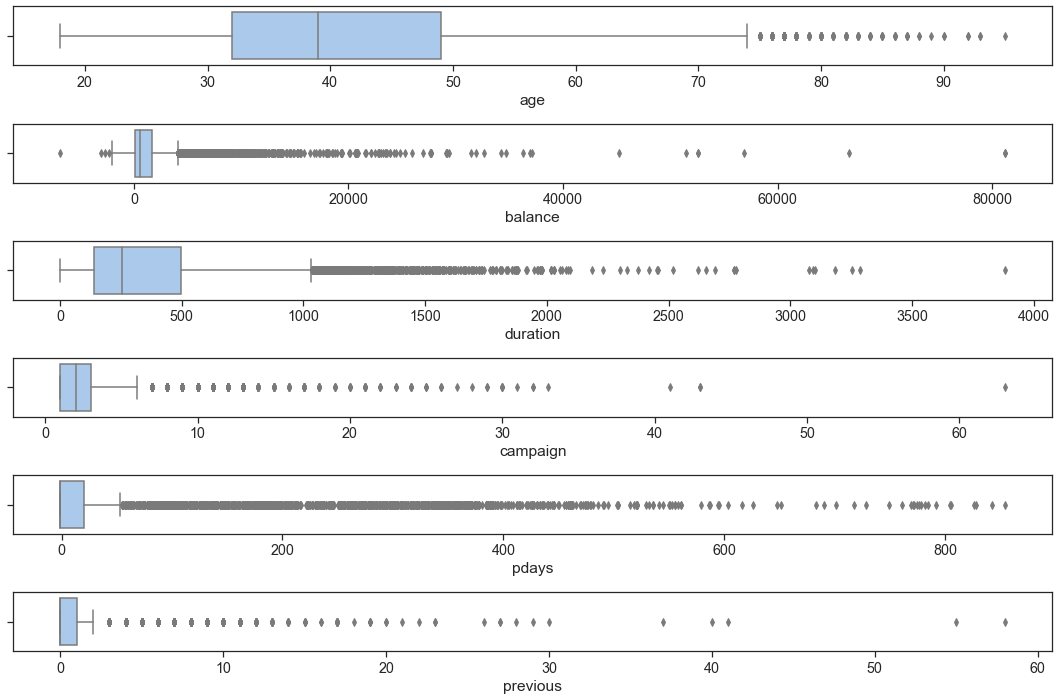

In [9]:
fig, axs = plt.subplots(nrows=len(num_cols),figsize=(15,10))
for i, col in enumerate(num_cols):
    f = sns.boxplot(x=col,data=df,orient='h',ax=axs[i])
fig.tight_layout()

<b>Observations:</b>
<ol>
    <li>Most clients are around 40 years old</li>
    <li>Most clients are contacted in the middle of the month</li>
    <li>Most calls are under 500 secs (8 minutes)</li>
    <li>Most clients were contacted 2 or 3 times</li>
    <li>Most clients were contacted about 20 days after the previous campaign.</li>
    <li>Most clients were contacted only 1 or 2 times before this campaign</li>
</ol>

<h3>1.4 Data Exploration</h3><br>
Explore the difference between clients who joined the campaign and those who did not.

<h4>Check Column Correlations</h4>

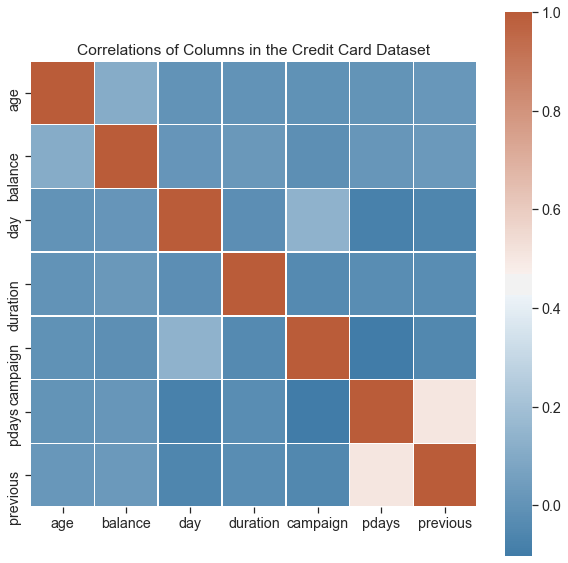

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(600, 24, as_cmap=True)

fig = sns.heatmap(df.corr(), cmap=cmap, square=True, linewidths=0.5)
fig.set(title='Correlations of Columns in the Credit Card Dataset')
plt.show()

The pdays and previous columns appear to be related. However, the correlation is not so high.<br>
Generally, the number of days after previous campaign and the number of contacts made before the current campaign should not be related.

<h4>Check Percent of Customers That Joined The Campaign</h4>

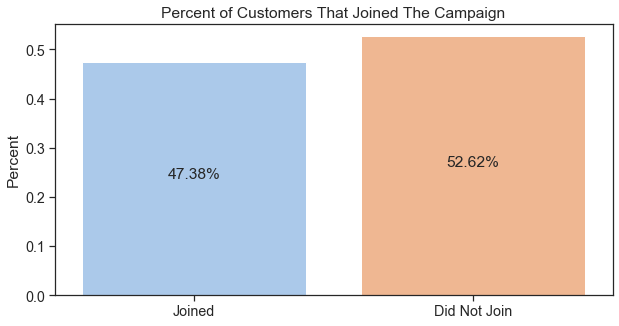

In [11]:
defaulted = pd.DataFrame(df['deposit'].value_counts(normalize=True)).reset_index()
fig, ax = plt.subplots(figsize=(10,5))
fig = sns.barplot(x='index',y='deposit',order=['yes','no'],data=defaulted)
fig.set(xlabel='',ylabel='Percent',title='Percent of Customers That Joined The Campaign')
fig.set_xticklabels(['Joined','Did Not Join'])
for f in fig.patches:
    h = f.get_height()
    fig.text(f.get_x() + f.get_width()/2, h/2, str(round(h*100,2))+'%' ,ha="center")

<h4>Check Difference between Customers Who Joined The Campaign and Those Who Did Not</h4>

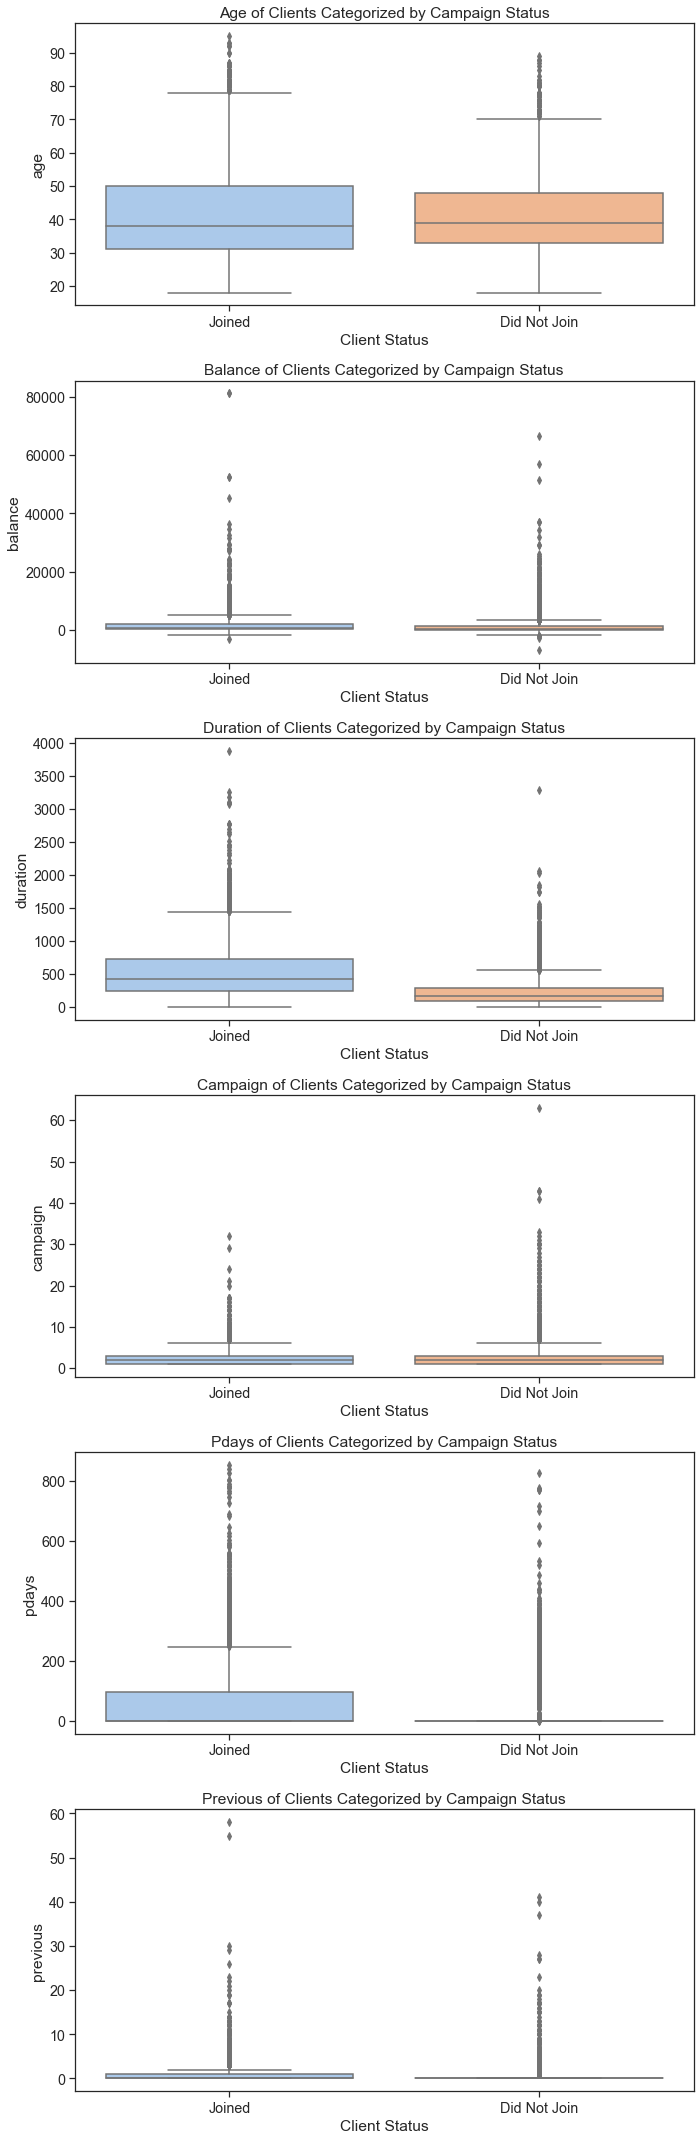

In [12]:
fig, axs = plt.subplots(nrows=len(num_cols),figsize=(10,30))
for i, col in enumerate(num_cols):
    f = sns.boxplot(x='deposit', y=col,data=df,ax=axs[i])
    f.set(xlabel='Client Status',ylabel=col,title=col.capitalize()+' of Clients Categorized by Campaign Status')
    f.set_xticklabels(['Joined','Did Not Join'])
    for p in f.patches:
        h = p.get_height()
        f.text(p.get_x() + p.get_width()/2, h/2, str(round(h,2)),ha='center')
fig.tight_layout()

<b>Observations:</b>
<ol>
    <li>Clients with higher balance are more likely to join the campaign</li>
    <li>Clients who joined the campaign had higher call durations<br>
       This is reasonable since clients who were interested in the campaign will want to
       learn more about the campaign in the call, thus having longer call durations
    </li>
    <li>Clients who joined the campaign are contacted fewer times<br>
       This is also reasonable since clients who were interested in the campaign did not need to be contacted multiple times.
    </li>
    <li>The clients who were contacted previously were more likely to join the campaign</li>
    <li>The clients who were contacted more times in the previous campaign were more likely to join the campaign
    </li>
</ol>


<b>Notes:</b>
<ol>
    <li>There were clients who were contacted around 60 times<br>
       Check these clients and decide whether to remove these clients.
    </li>
</ol>

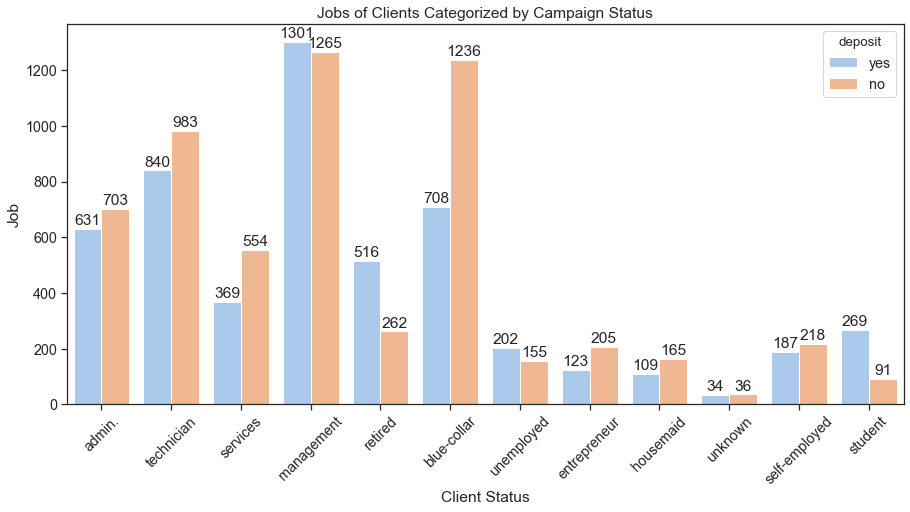

In [13]:
fig = plt.subplots(figsize=(15,7))
fig = sns.countplot(hue='deposit', x='job', data=df)
fig.set(xlabel='Client Status',ylabel='Job',title='Jobs of Clients Categorized by Campaign Status')
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
for p in fig.patches:
    h = p.get_height()
    fig.text(p.get_x() + p.get_width()/2, h+15, str(round(h,2)),ha='center')
plt.show()

Blue collars are less likely to join the campaign, while clients with management jobs, clients that are unemployed or retired, and students are more likely to join the campaign.

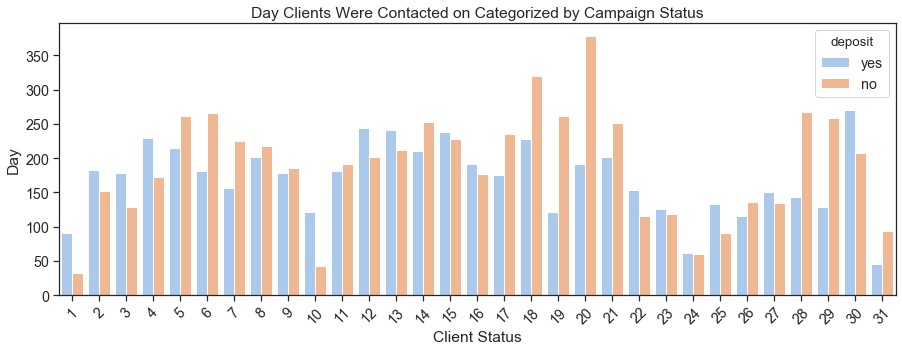

In [14]:
fig = plt.subplots(figsize=(15,5))
fig = sns.countplot(hue='deposit', x='day', data=df)
fig.set(xlabel='Client Status',ylabel='Day',title='Day Clients Were Contacted on Categorized by Campaign Status')
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show()

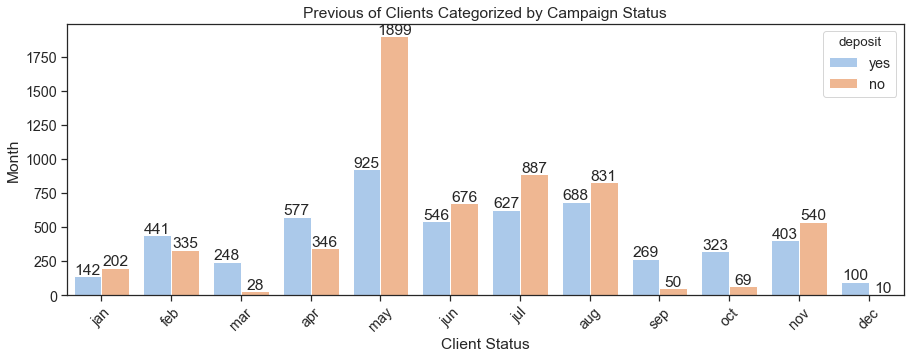

In [15]:
fig = plt.subplots(figsize=(15,5))
fig = sns.countplot(hue='deposit', x='month', data=df, order=months)
fig.set(xlabel='Client Status',ylabel='Month',title=col.capitalize()+' of Clients Categorized by Campaign Status')
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
for p in fig.patches:
    h = p.get_height()
    fig.text(p.get_x() + p.get_width()/2, h+15, str(round(h,2)),ha='center')
plt.show()

<h4>Check The Distribution of Clients' Jobs in Each Month</h4>

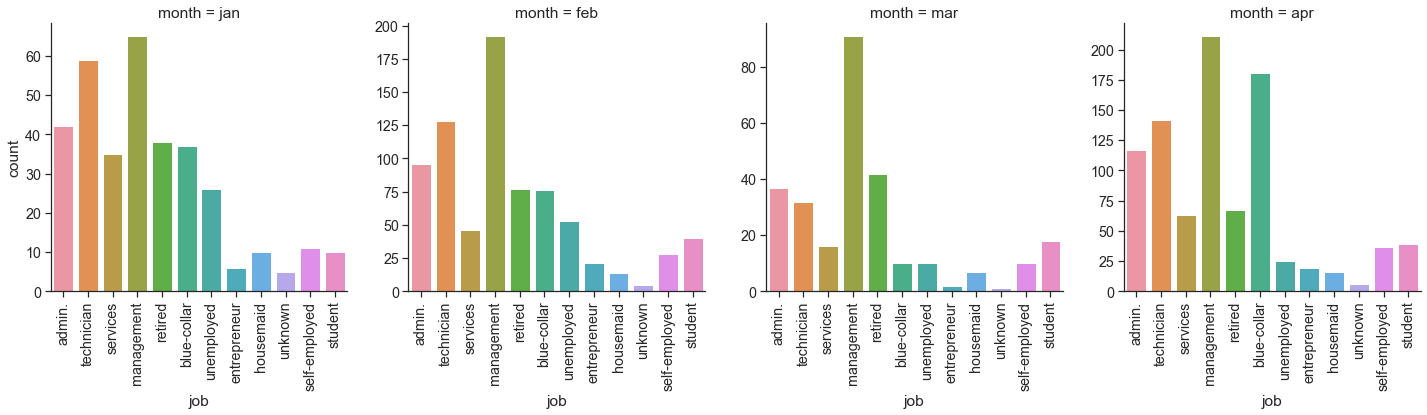

In [16]:
jobs = list(df.job.unique())
fig = sns.catplot(col='month',x='job',
                  data=df.loc[df.month.isin(months[0:4])],
                  kind='count',
                  order=jobs,
                  sharey=False)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in fig.axes.flat]
plt.show()

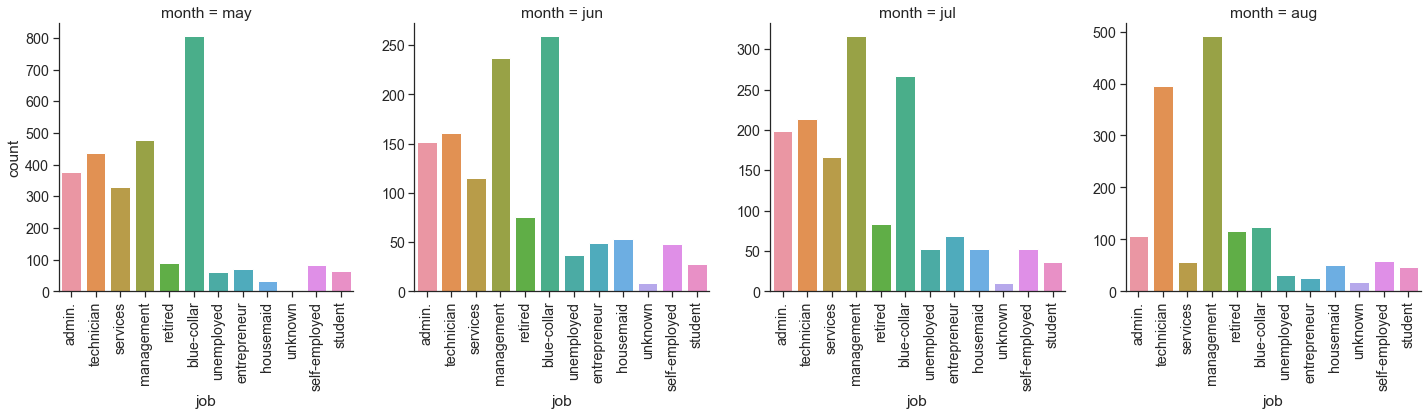

In [17]:
fig = sns.catplot(col='month',x='job',
                  data=df.loc[df.month.isin(months[4:8])],
                  kind='count',
                  order=jobs,
                  sharey=False)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in fig.axes.flat]
plt.show()

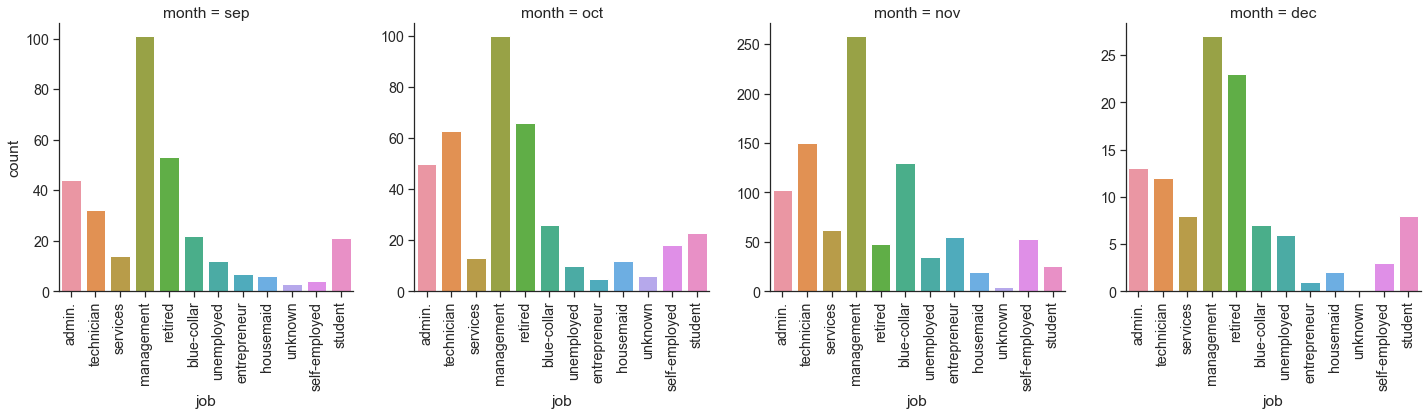

In [18]:
fig = sns.catplot(col='month',x='job',
                  data=df.loc[df.month.isin(months[8:12])],
                  kind='count',col_order=months[8:12],
                  order=jobs,
                  sharey=False)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in fig.axes.flat]
plt.show()

Plotting the number of clients with different jobs contacted in each month shows that the number of clients joining the campaign each month is largely related to the jobs of the clients contacted in that month.

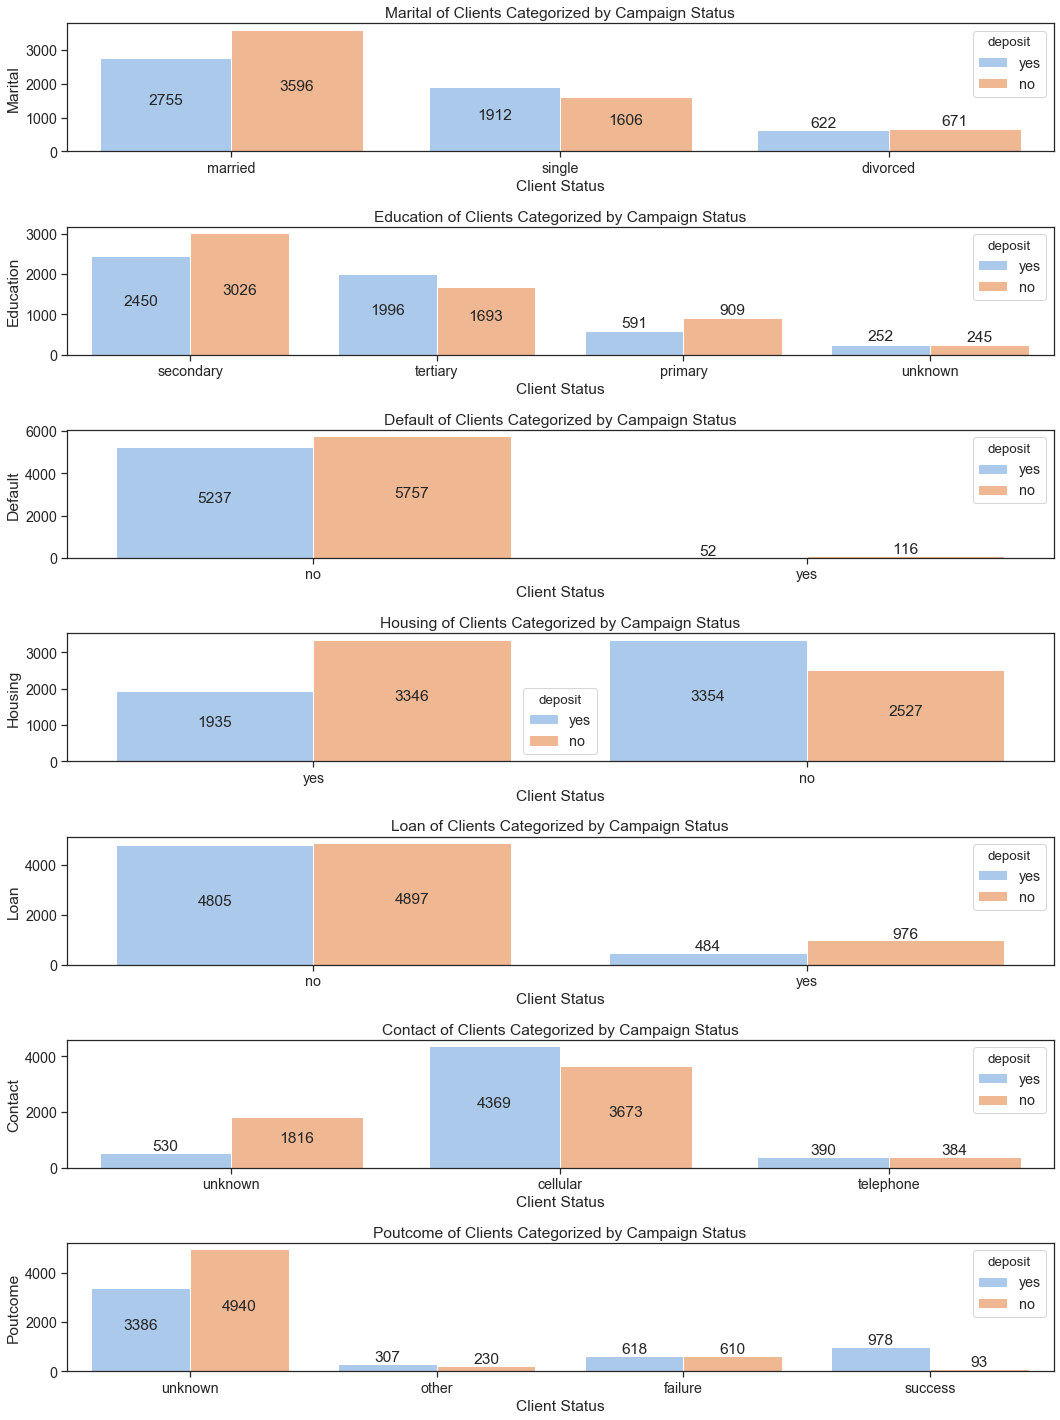

In [19]:
plt_cols = [col for col in cat_cols if col not in ['job','month','day']]
fig, axs = plt.subplots(nrows=len(plt_cols),figsize=(15,20))
for i, col in enumerate(plt_cols):
    f = sns.countplot(hue='deposit', x=col, data=df,ax=axs[i])
    f.set(xlabel='Client Status',ylabel=col.capitalize(),title=col.capitalize()+' of Clients Categorized by Campaign Status')
    for p in f.patches:
        h = p.get_height()
        label_height = h/2 if h > 1000 else h + 100
        f.text(p.get_x() + p.get_width()/2, label_height, str(h),ha='center')
fig.tight_layout()

<b>Observations:</b>
<ol>
    <li>Married clients are less likely to join the campaign</li>
    <li>Clients with secondary education are less likely to join the campaign</li>
    <li>Clients with housing lone are less likely to join the campaign, while clients without housing lone are more likely to join the campaign<br>
       These clients possibly didn't want to add extra financial burden by joining the campaign
    </li>
    <li>The clients who joined the previous campaign are more likely to join the new campaign</li>
</ol>

<h2>Part2. Model Selection</h2><br>
Evaluate different machine learning models based on their precision.

<h4>Convert Categorical Variables</h4>

In [20]:
def generate_category(col):
    cat_dict = {}
    for i, v in enumerate(df[col].unique()):
        cat_dict[v] = i
    return cat_dict

def convert_category(cat, cat_dict):
    return cat_dict[cat]

In [21]:
df_cat = df.copy()
convert_cols = [col for col in cat_cols if col not in ['day','month']]
for col in convert_cols:
    df_cat[col] = df[col].apply(convert_category,args=(generate_category(col),))

deposit_dict = {'no':0,'yes':1}
df_cat['deposit'] = df['deposit'].apply(lambda x : deposit_dict[x])

month_dict = {}
for i in range(12):
    month_dict[months[i]] = i+1
df_cat['month'] = df['month'].apply(lambda x : month_dict[x])
df_cat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,0,0,0,5,5,1042,1,-1,0,0,1
1,56,0,0,0,0,45,1,0,0,5,5,1467,1,-1,0,0,1
2,41,1,0,0,0,1270,0,0,0,5,5,1389,1,-1,0,0,1
3,55,2,0,0,0,2476,0,0,0,5,5,579,1,-1,0,0,1
4,54,0,0,1,0,184,1,0,0,5,5,673,2,-1,0,0,1


<h4>Split Train and Test Data</h4>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_cat[cols],
                                                    df_cat['deposit'],
                                                    test_size=0.3, random_state=0)

#### Random Forest

In [24]:
params = {'n_estimators':list(range(50,400,50)),
          'max_features':list(range(3,17)),
          'max_depth':list(range(3,18)),
          'min_samples_split':list(range(1,5)),
          'min_samples_leaf':list(range(1,5))
         }
rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_distributions=params,
    cv = 5,
    random_state=0,
    n_jobs = -1
)

rand_result = rand_search.fit(df_cat[cols],df_cat['deposit'])

print('The best hyperparameters for Random Forest Classifier is:')
for key,value in rand_result.best_params_.items():
    print(key,': ',value,sep='')

The best hyperparameters for Random Forest Classifier is:
n_estimators: 300
min_samples_split: 3
min_samples_leaf: 3
max_features: 10
max_depth: 16


In [25]:
rfc = RandomForestClassifier(**rand_result.best_params_)
rfc = rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)
print('The precision of Random Forest Classifier is:',round(rfc.score(X_test,y_test),3))
print(classification_report(y_test,y_predict))

The precision of Random Forest Classifier is: 0.851
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1792
           1       0.82      0.87      0.84      1557

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



<h4>Gradient Boosting</h4>

In [62]:
params = {'loss':['deviance','exponential'],
          'learning_rate':np.linspace(0.1,0.5,5),
          'n_estimators':list(range(50,400,50)),
          'max_depth':list(range(2,5)),
          'max_features':list(range(3,17))
         }
rand_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_distributions=params,
    cv=2,
    random_state=0,
    n_jobs = -1
)

rand_result = rand_search.fit(df_cat[cols],df_cat['deposit'])

print('The best hyperparameters for Gradient Boosting Classifier is:')
for key,value in rand_result.best_params_.items():
    print(key,': ',value,sep='')

The best hyperparameters for Gradient Boosting Classifier is:
n_estimators: 100
max_features: 12
max_depth: 2
loss: deviance
learning_rate: 0.4


In [63]:
gbc = GradientBoostingClassifier(**rand_result.best_params_)
gbc = gbc.fit(X_train, y_train)

y_predict = gbc.predict(X_test)
print('The precision of Gradient Boosting Classifier is',round(gbc.score(X_test,y_test),3))
print(classification_report(y_test,y_predict))

The precision of Gradient Boosting Classifier is 0.853
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1792
           1       0.83      0.86      0.84      1557

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



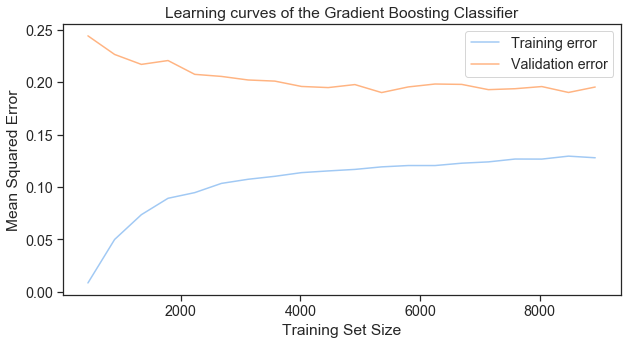

In [79]:
num_size = 20
training_sizes = np.linspace(1/num_size,1,num_size)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = gbc,
    X = df_cat[cols], y = df_cat['deposit'],
    train_sizes=training_sizes,
    shuffle=True, cv=5, 
    scoring = 'neg_mean_squared_error'
)

plt.subplots(figsize=(10,5))
plt.plot(train_sizes, -train_scores.mean(axis=1), label = 'Training error')
plt.plot(train_sizes, -validation_scores.mean(axis=1), label = 'Validation error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Set Size')
plt.title('Learning curves of the Gradient Boosting Classifier')
plt.legend()
plt.show()

<h2>Part 3. Model Optimization</h2><br>
Optimize the gradient boosting model.

<h4>Perform more cross validations</h4>

In [176]:
params = {'loss':['deviance','exponential'],
          'learning_rate':np.linspace(0.1,0.5,5),
          'n_estimators':list(range(50,400,50)),
          'max_depth':list(range(2,5)),
          'max_features':list(range(3,17))
         }
rand_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_distributions=params,
    cv=5,
    random_state=0,
    n_jobs = -1
)

rand_result = rand_search.fit(df_cat[cols],df_cat['deposit'])

print('The best hyperparameters for Gradient Boosting Classifier is:')
for key,value in rand_result.best_params_.items():
    print(key,': ',value,sep='')

The best hyperparameters for Gradient Boosting Classifier is:
n_estimators: 150
max_features: 10
max_depth: 4
loss: deviance
learning_rate: 0.2


In [177]:
gbc = GradientBoostingClassifier(**rand_result.best_params_)
gbc = gbc.fit(X_train, y_train)

y_predict = gbc.predict(X_test)
print('The precision of Gradient Boosting Classifier is',round(gbc.score(X_test,y_test),3))
print(classification_report(y_test,y_predict))

The precision of Gradient Boosting Classifier is 0.859
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1792
           1       0.84      0.86      0.85      1557

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



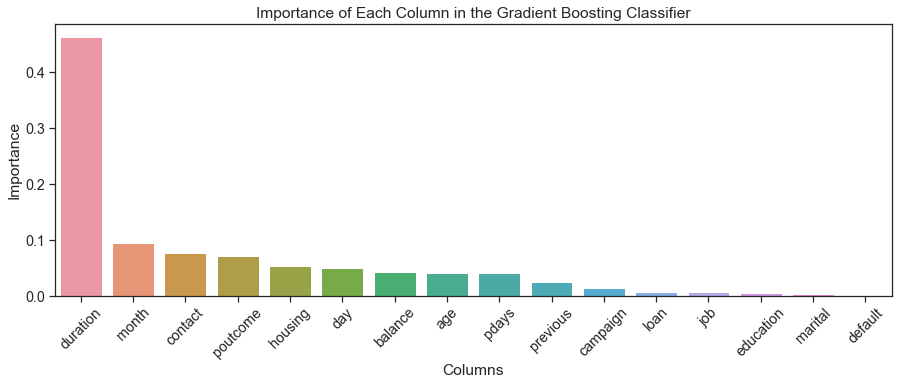

In [178]:
col_importance = pd.DataFrame(
    {'columns':df_cat[cols].columns,
     'importance':gbc.feature_importances_}
).sort_values(by='importance',ascending=False)

fig, ax = plt.subplots(figsize=(15,5))
fig = sns.barplot(x='columns',y='importance',data=col_importance)
fig.set(xlabel='Columns',ylabel='Importance',title='Importance of Each Column in the Gradient Boosting Classifier')
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show()
# for f in fig.patches:
#     h = f.get_height()
#     fig.text(f.get_x() + f.get_width()/2, h/2, str(round(h*100,2))+'%' ,ha="center")

<h4>Feature engineering</h4>
Categorize continuous variables such as age and balance.

In [95]:
df_cat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,0,0,0,5,5,1042,1,-1,0,0,1
1,56,0,0,0,0,45,1,0,0,5,5,1467,1,-1,0,0,1
2,41,1,0,0,0,1270,0,0,0,5,5,1389,1,-1,0,0,1
3,55,2,0,0,0,2476,0,0,0,5,5,579,1,-1,0,0,1
4,54,0,0,1,0,184,1,0,0,5,5,673,2,-1,0,0,1


In [238]:
df_sel = df_cat.copy()

bins = [0,29.9,39.9,49.9,59.9,100]
group_names = [0,1,2,3,4]
df_sel['age'] = pd.cut(df_cat['age'], bins, labels=group_names)

bins = [-10000,-0.1,2499.9,4999.9,9999.9,19999.9,100000]
group_names = [0,1,2,3,4,5]
df_sel['balance'] = pd.cut(df_cat['balance'], bins, labels=group_names)

<h4>Drop Columns</h4>
Drop columns with the least importance to improve model speed.

In [239]:
df_sel = df_sel.drop(['campaign','loan','job','education','marital','default'],axis=1)

In [240]:
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(df_sel.drop('deposit',axis=1),
                                                    df_sel['deposit'],
                                                    test_size=0.3, random_state=0)

In [241]:
params = {'loss':['deviance','exponential'],
          'learning_rate':np.linspace(0.1,0.5,5),
          'n_estimators':list(range(50,400,50)),
          'max_depth':list(range(2,5)),
          'max_features':list(range(3,17))
         }
rand_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_distributions=params,
    cv=5,
    random_state=0,
    n_jobs = -1
)

rand_result = rand_search.fit(df_sel.drop('deposit',axis=1),df_sel['deposit'])

print('The best hyperparameters for Gradient Boosting Classifier is:')
for key,value in rand_result.best_params_.items():
    print(key,': ',value,sep='')

The best hyperparameters for Gradient Boosting Classifier is:
n_estimators: 250
max_features: 10
max_depth: 3
loss: exponential
learning_rate: 0.2


In [249]:
gbc = GradientBoostingClassifier(**rand_result.best_params_,random_state=50)

gbc = gbc.fit(X_sel_train, y_sel_train)

y_sel_predict = gbc.predict(X_sel_test)
print('The precision of Gradient Boosting Classifier is',round(gbc.score(X_sel_test,y_sel_test),3))
print(classification_report(y_sel_test,y_sel_predict))

The precision of Gradient Boosting Classifier is 0.862
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1792
           1       0.84      0.87      0.85      1557

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



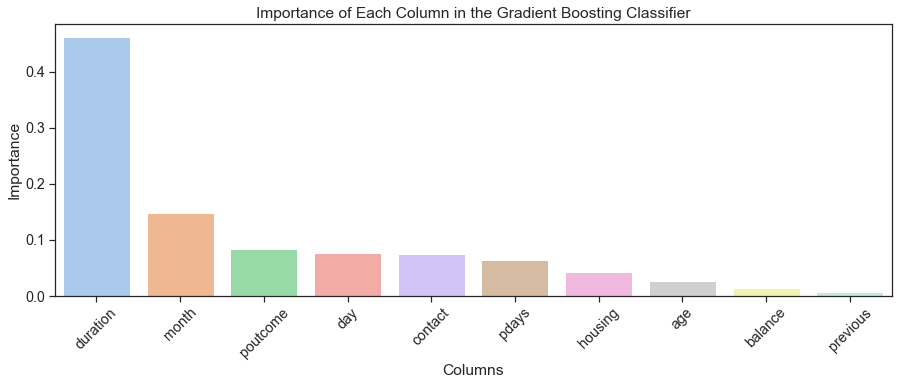

In [250]:
col_importance = pd.DataFrame(
    {'columns':df_sel.drop('deposit',axis=1).columns,
     'importance':gbc.feature_importances_}
).sort_values(by='importance',ascending=False)

fig, ax = plt.subplots(figsize=(15,5))
fig = sns.barplot(x='columns',y='importance',data=col_importance)
fig.set(xlabel='Columns',ylabel='Importance',title='Importance of Each Column in the Gradient Boosting Classifier')
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show()
# for f in fig.patches:
#     h = f.get_height()
#     fig.text(f.get_x() + f.get_width()/2, h/2, str(round(h*100,2))+'%' ,ha="center")

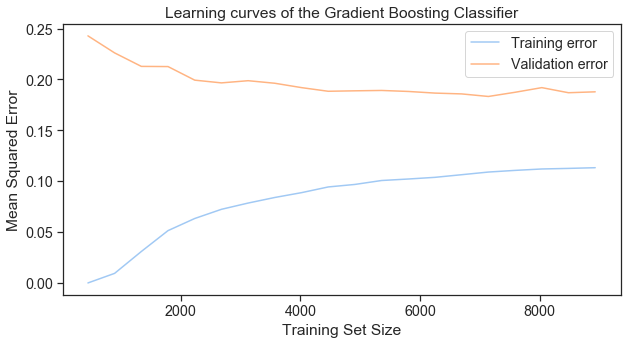

In [253]:
num_size = 20
training_sizes = np.linspace(1/num_size,1,num_size)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = gbc,
    X = df_sel.drop('deposit',axis=1), y = df_sel['deposit'],
    train_sizes=training_sizes,
    shuffle=True, cv=5, 
    scoring = 'neg_mean_squared_error'
)

plt.subplots(figsize=(10,5))
plt.plot(train_sizes, -train_scores.mean(axis=1), label = 'Training error')
plt.plot(train_sizes, -validation_scores.mean(axis=1), label = 'Validation error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Set Size')
plt.title('Learning curves of the Gradient Boosting Classifier')
plt.legend()
plt.show()